In [1]:
# find when two circles under downward gravity intersect



In [2]:
from sympy import symbols, Eq, Rational

# define symbols
t, acc_x, acc_y = symbols("t, acc_x, acc_y")
a_x, a_y, a_vx, a_vy, a_r, aprime_x, aprime_y = symbols("a_x, a_y, a_vx, a_vy, a_r, a'_x, a'_y")
b_x, b_y, b_vx, b_vy, b_r, bprime_x, bprime_y = symbols("b_x, b_y, b_vx, b_vy, b_r, b'_x, b'_y")

# define equations
half = Rational(1, 2)
eq1 = Eq(aprime_x, a_x + a_vx * t + half * acc_x * t ** 2)
eq2 = Eq(aprime_y, a_y + a_vy * t + half * acc_y * t ** 2)
eq3 = Eq(bprime_x, b_x + b_vx * t + half * acc_x * t ** 2)
eq4 = Eq(bprime_y, b_y + b_vy * t + half * acc_y * t ** 2)
eq5 = Eq((aprime_x - bprime_x) ** 2 + (aprime_y - bprime_y) ** 2,
         (a_r + b_r)**2)

eq1

Eq(a'_x, a_vx*t + a_x + acc_x*t**2/2)

In [3]:
# 206 minutes
from sympy import nonlinsolve
from perfect_physics import save

cc_acc_all_solutions = nonlinsolve([eq1, eq2, eq3, eq4, eq5], t, aprime_x, aprime_y, bprime_x, bprime_y)
cc_acc_time_solutions = [t for t, aprime_x, ap_y, bp_x, bp_y in cc_acc_all_solutions]
save(cc_acc_time_solutions, "cc_acc_time_solutions.sympy")
cc_acc_time_solutions[0]

(-a_vx*a_x + a_vx*b_x - a_vy*a_y + a_vy*b_y + a_x*b_vx + a_y*b_vy - b_vx*b_x - b_vy*b_y + sqrt(a_r**2*a_vx**2 - 2*a_r**2*a_vx*b_vx + a_r**2*a_vy**2 - 2*a_r**2*a_vy*b_vy + a_r**2*b_vx**2 + a_r**2*b_vy**2 + 2*a_r*a_vx**2*b_r - 4*a_r*a_vx*b_r*b_vx + 2*a_r*a_vy**2*b_r - 4*a_r*a_vy*b_r*b_vy + 2*a_r*b_r*b_vx**2 + 2*a_r*b_r*b_vy**2 - a_vx**2*a_y**2 + 2*a_vx**2*a_y*b_y + a_vx**2*b_r**2 - a_vx**2*b_y**2 + 2*a_vx*a_vy*a_x*a_y - 2*a_vx*a_vy*a_x*b_y - 2*a_vx*a_vy*a_y*b_x + 2*a_vx*a_vy*b_x*b_y - 2*a_vx*a_x*a_y*b_vy + 2*a_vx*a_x*b_vy*b_y + 2*a_vx*a_y**2*b_vx - 4*a_vx*a_y*b_vx*b_y + 2*a_vx*a_y*b_vy*b_x - 2*a_vx*b_r**2*b_vx + 2*a_vx*b_vx*b_y**2 - 2*a_vx*b_vy*b_x*b_y - a_vy**2*a_x**2 + 2*a_vy**2*a_x*b_x + a_vy**2*b_r**2 - a_vy**2*b_x**2 + 2*a_vy*a_x**2*b_vy - 2*a_vy*a_x*a_y*b_vx + 2*a_vy*a_x*b_vx*b_y - 4*a_vy*a_x*b_vy*b_x + 2*a_vy*a_y*b_vx*b_x - 2*a_vy*b_r**2*b_vy - 2*a_vy*b_vx*b_x*b_y + 2*a_vy*b_vy*b_x**2 - a_x**2*b_vy**2 + 2*a_x*a_y*b_vx*b_vy - 2*a_x*b_vx*b_vy*b_y + 2*a_x*b_vy**2*b_x - a_y**2*b_vx**2

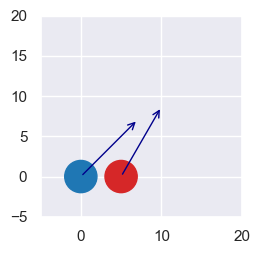

In [22]:
from sympy import cos, sin, pi
from perfect_physics import Circle, plot
a_angle = 45 * pi / 180
a_speed = 10
b_angle = 60 * pi / 180
b_speed = 10

a = Circle(x=0, y=0, r=2, vx=a_speed * cos(a_angle), vy=a_speed * sin(a_angle))
b = Circle(x=5, y=0, r=2, vx=b_speed * cos(b_angle), vy=b_speed * sin(b_angle))
w_acc_x = 0
w_acc_y = -9.8

plot(
    [a, b],
    colors=["tab:blue", "tab:red"],
    xlim=[-5, 20],
    ylim=[-5, 20],
    font_scale=1,
)
pass


[(2.5136718961537716+0j), (0.5253861151062826+0j)]


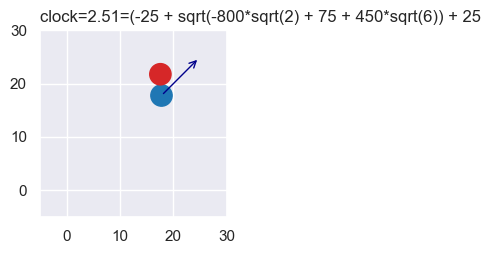

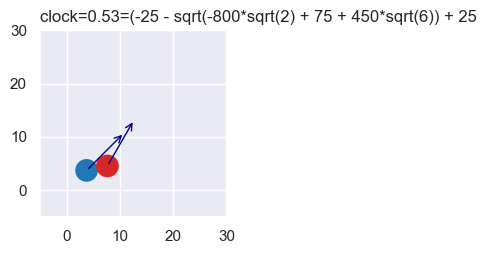

In [24]:
from perfect_physics import load
cc_time_solutions = load("cc_acc_time_solutions.sympy")
times = [time_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),
                             ("b_x", b.x), ("b_y", b.y), ("b_r", b.r), ("b_vx", b.vx), ("b_vy", b.vy)])
         for time_solution in cc_time_solutions]
# print(len(times), times)
print([complex(time) for time in times])
for time in times:
    plot([a.tick_clone(time), b.tick_clone(time)], clock=time,
    colors=["tab:blue","tab:red"],
    xlim=[-5, 30],
    ylim=[-5, 30],
    font_scale=1)